# Spots and A(Li)

Exploring the impact of short-timescale spots on observed lithium abundances.

Start with some preliminaries.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
cd /Users/grefe950/Projects/starspot/models/age_120.0+z_0.00/sts/

/Users/grefe950/Projects/starspot/models/age_120.0+z_0.00/sts


Define a reusable isochrone loader that also trims the fat from the isochrone.

In [3]:
# routine to load a compressed isochrones
def loadIsochrone(filename):
    iso = np.genfromtxt(filename)
    bools = [x[0] < 1.65 for x in iso]
    return np.compress(bools, iso, axis=0)

Lithium abundances are typically compared against either inferred stellar "effective" temperatures or against stellar bolometric luminosities. We'll begin with the "effective" temperature, which is taken to be the average surface temperature (as would presumably be derived from colors or SED fitting).

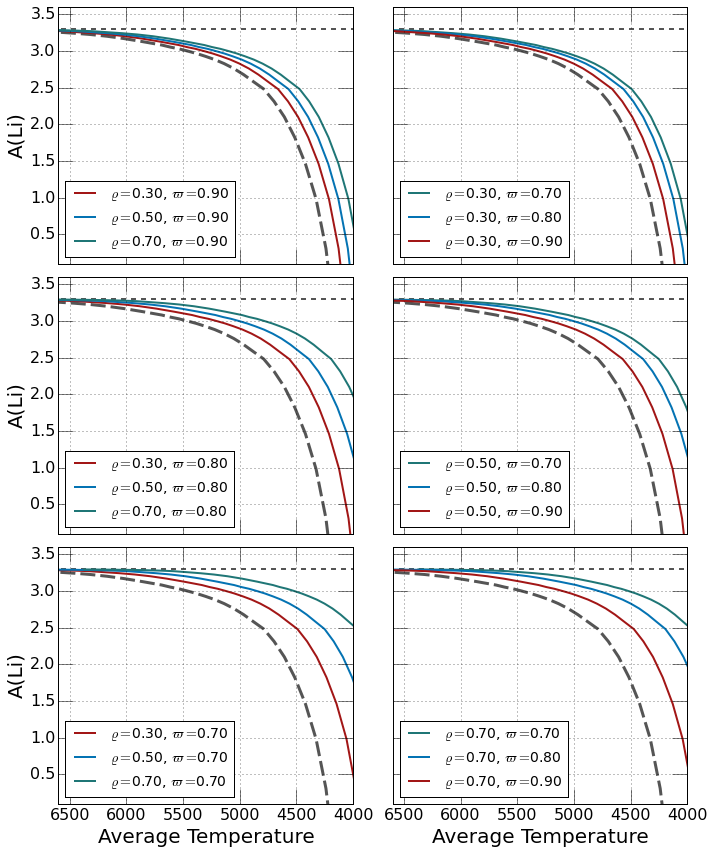

In [35]:
colors = {0: '#1F7676', 1:'#0473B3', 2: '#A21616', 3:'#555555'}
varpi  = np.array([0.7, 0.8, 0.9])
varrho = np.array([0.3, 0.5, 0.7])

fig, ax = plt.subplots(3, 2, figsize=(10., 12.), sharex=True, sharey=True)
    
# set x-axis labels
for i in range(2):
    ax[2, i].set_xlim(6600., 4000.)
    ax[2, i].set_ylim(0.1, 3.6)
    ax[2, i].set_xlabel('Average Temperature', fontsize=20.)

# load standard isochrone
iso = loadIsochrone('../isochrone_120.0myr_z+0.00_a+0.00_marcs.iso')

# initial Li abundance
Li_init = np.array([[3000., 3.3], [8000., 3.3]])

# left column, vary rho
for i in range(3):
    ax[i, 0].tick_params(which='major', axis='both', length=15., labelsize=16.)
    ax[i, 0].set_ylabel('A(Li)', fontsize=20.)
    
    ax[i, 0].plot(10**iso[:,1], iso[:,5], lw=3, dashes=(15., 5.), c=colors[3])
    ax[i, 0].plot(Li_init[:,0], Li_init[:,1], lw=2, dashes=(5.0, 5.0), c=colors[3])
    
    # compute zeta for (varpi, varrho); plot spotted isochrone
    zeta   = 1.0 - varrho*(1.0 - varpi[2-i]**4)
    for j in range(len(zeta)):
        filename = 'mag_zet{:+4.2f}_eps+1.00_rho{:+4.2f}_pi{:+4.2f}.dat'.format(zeta[j], varrho[j], varpi[2-i])
        line = '$\\varrho = ${:4.2f}, $\\varpi = ${:4.2f}'.format(varrho[j], varpi[2-i])
        spot_iso = loadIsochrone(filename)
        ax[i, 0].plot(10**spot_iso[:, 1], spot_iso[:, 5], lw=2, c=colors[2-j], label=line)
        
    ax[i, 0].legend(loc=3, fontsize=14.)
    ax[i, 0].grid(True)

# left column, vary varpi
for i in range(3):
    ax[i, 1].tick_params(which='major', axis='both', length=15., labelsize=16.)    
    ax[i, 1].plot(10**iso[:,1], iso[:,5], lw=3, dashes=(15., 5.), c=colors[3])
    ax[i, 1].plot(Li_init[:,0], Li_init[:,1], lw=2, dashes=(5.0, 5.0), c=colors[3])
    
    # compute zeta for (varpi, varrho); plot spotted isochrone
    zeta   = 1.0 - varrho[i]*(1.0 - varpi**4)
    for j in range(len(zeta)):
        filename = 'mag_zet{:+4.2f}_eps+1.00_rho{:+4.2f}_pi{:+4.2f}.dat'.format(zeta[j], varrho[i], varpi[j])
        line = '$\\varrho = ${:4.2f}, $\\varpi = ${:4.2f}'.format(varrho[i], varpi[j])
        spot_iso = loadIsochrone(filename)
        ax[i, 1].plot(10**spot_iso[:, 1], spot_iso[:, 5], lw=2, c=colors[j], label=line)
        
    ax[i, 1].legend(loc=3, fontsize=14.)
    ax[i, 1].grid(True)
    
fig.tight_layout()

And now stellar bolometric luminosity.

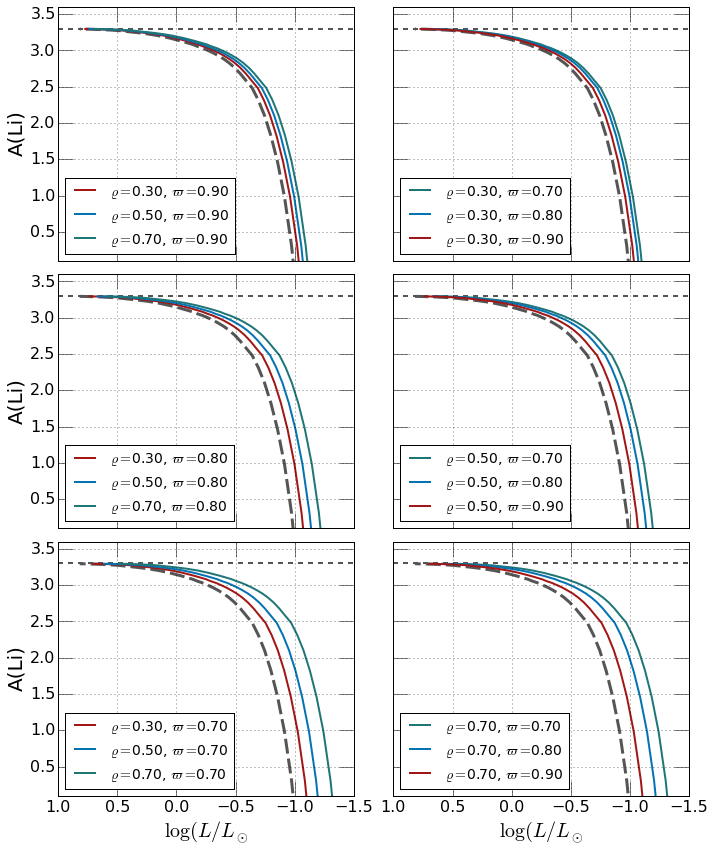

In [39]:
fig, ax = plt.subplots(3, 2, figsize=(10., 12.), sharex=True, sharey=True)
    
# set x-axis labels
for i in range(2):
    ax[2, i].set_xlim(1., -1.5)
    ax[2, i].set_ylim(0.1, 3.6)
    ax[2, i].set_xlabel('$\\log (L/L_{\\odot}$', fontsize=20.)

# load standard isochrone
iso = loadIsochrone('../isochrone_120.0myr_z+0.00_a+0.00_marcs.iso')

# initial Li abundance
Li_init = np.array([[1., 3.3], [-3., 3.3]])

# left column, vary rho
for i in range(3):
    ax[i, 0].tick_params(which='major', axis='both', length=15., labelsize=16.)
    ax[i, 0].set_ylabel('A(Li)', fontsize=20.)
    
    ax[i, 0].plot(iso[:,3], iso[:,5], lw=3, dashes=(15., 5.), c=colors[3])
    ax[i, 0].plot(Li_init[:,0], Li_init[:,1], lw=2, dashes=(5.0, 5.0), c=colors[3])
    
    # compute zeta for (varpi, varrho); plot spotted isochrone
    zeta   = 1.0 - varrho*(1.0 - varpi[2-i]**4)
    for j in range(len(zeta)):
        filename = 'mag_zet{:+4.2f}_eps+1.00_rho{:+4.2f}_pi{:+4.2f}.dat'.format(zeta[j], varrho[j], varpi[2-i])
        line = '$\\varrho = ${:4.2f}, $\\varpi = ${:4.2f}'.format(varrho[j], varpi[2-i])
        spot_iso = loadIsochrone(filename)
        ax[i, 0].plot(spot_iso[:, 3], spot_iso[:, 5], lw=2, c=colors[2-j], label=line)
        
    ax[i, 0].legend(loc=3, fontsize=14.)
    ax[i, 0].grid(True)

# left column, vary varpi
for i in range(3):
    ax[i, 1].tick_params(which='major', axis='both', length=15., labelsize=16.)    
    ax[i, 1].plot(iso[:,3], iso[:,5], lw=3, dashes=(15., 5.), c=colors[3])
    ax[i, 1].plot(Li_init[:,0], Li_init[:,1], lw=2, dashes=(5.0, 5.0), c=colors[3])
    
    # compute zeta for (varpi, varrho); plot spotted isochrone
    zeta   = 1.0 - varrho[i]*(1.0 - varpi**4)
    for j in range(len(zeta)):
        filename = 'mag_zet{:+4.2f}_eps+1.00_rho{:+4.2f}_pi{:+4.2f}.dat'.format(zeta[j], varrho[i], varpi[j])
        line = '$\\varrho = ${:4.2f}, $\\varpi = ${:4.2f}'.format(varrho[i], varpi[j])
        spot_iso = loadIsochrone(filename)
        ax[i, 1].plot(spot_iso[:, 3], spot_iso[:, 5], lw=2, c=colors[j], label=line)
        
    ax[i, 1].legend(loc=3, fontsize=14.)
    ax[i, 1].grid(True)
    
fig.tight_layout()